# Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Please be cautious when interpreting the code or results.

This notebook provides an introduction to the Dandiset 000945, which contains neural spiking data in the awake rat somatosensory cortex responding to trials of transcranial focused ultrasound stimulation.
The dataset includes recordings from 10 male rats implanted with chronic electrodes in the somatosensory cortex.
Ultrasound stimulation was delivered at different pulse repetition frequencies (PRFs), and electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes.

The notebook demonstrates how to:

1.  Load and explore the dataset's structure
2.  Access and visualize sample data from NWB files
3.  Perform common analyses relevant to the dataset's content

Before using this notebook, please ensure you have installed the necessary packages:

```bash
pip install lindi pynwb matplotlib numpy seaborn dandi
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())
assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f7be306a890>, identifier='bbd6a696-a68a-4790-820e-02794bd7829d', path='sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb', size=1674720, created=datetime.datetime(2024, 3, 30, 3, 15, 52, 707737, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 2, 13, 22, 12, 11, 66289, tzinfo=TzInfo(UTC)), blob='6119261b-2891-49dd-8781-44a82a01687b', dandiset_id='000945', version_id='0.250213.2212'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f7be306a890>, identifier='d1fa906a-2dc2-4b71-a9e6-26eceafdc21a', path='sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb', size=2555728, created=datetime.datetime(2024, 3, 30, 3, 15, 52, 733988, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 2, 13, 22, 12, 11, 88593, tzinfo=TzInfo(UTC)), blob='847a9fbd-6c4b-42a9-b0f9-3da0bfa41cc8', dandiset_id='000945', version_id='0.250213.2212'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f7be306a

The above code block uses the DANDI API to list all of the assets in the Dandiset.

## Loading and Exploring the Dataset

The dataset is stored in the Neurodata Without Borders (NWB) format.
We will use the `pynwb` and `lindi` libraries to load and explore the data. We will be loading remote files which may
take time.

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the NWB file
try:
    f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/000945/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/nwb.lindi.json")
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")

NWB file loaded successfully.


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring the NWB File Content

Now we can explore the content of the NWB file.

In [3]:
nwb.session_description

'Awake S1 Stimulation by tFUS'

In [4]:
nwb.identifier

'BH498_3000_200_anes'

In [5]:
nwb.session_start_time

datetime.datetime(2024, 3, 10, 14, 37, 29, tzinfo=tzoffset(None, -14400))

Getting information about the electrodes and units.

In [6]:
electrodes = nwb.electrodes
electrodes.colnames

('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')

In [7]:
electrode_ids = electrodes["id"].data[:]
len(electrode_ids)

32

In [8]:
units = nwb.units
units.colnames

('spike_times', 'celltype_label')

In [9]:
unit_ids = units["id"].data
len(unit_ids)

64

## Accessing and Visualizing Sample Data

The following code shows how to access and visualize sample data from the NWB file.
We will start by plotting the spike times for a subset of units.

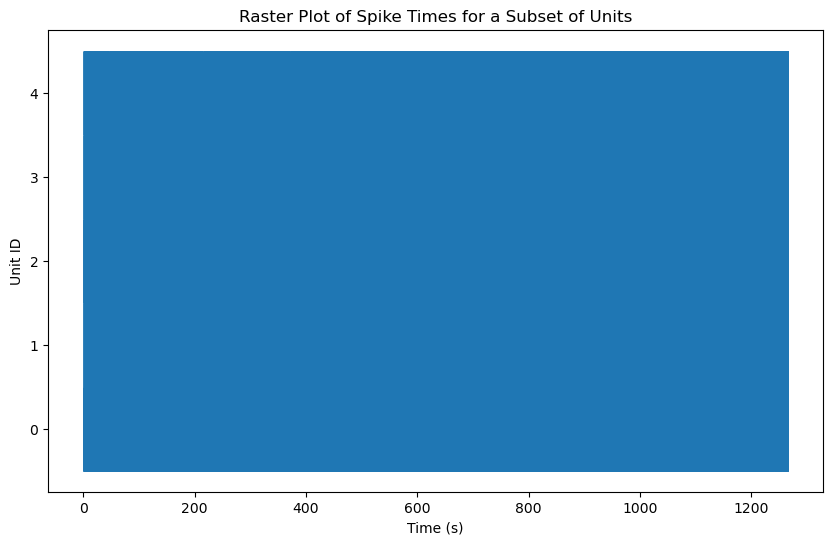

In [10]:
# Get spike times for a subset of units
try:
    units = nwb.units
    unit_ids = units["id"].data[:]
    num_units = len(unit_ids)
    num_units_to_plot = min(5, num_units) # Plot max 5 units
    spike_times = []
    for i in range(num_units_to_plot):
        spike_times.append(units["spike_times"][i][:])

    # Create a raster plot
    plt.figure(figsize=(10, 6))
    for i, spikes in enumerate(spike_times):
        plt.vlines(spikes, i + 0.5, i + 1.5, linewidth=0.5)

    plt.xlabel("Time (s)")
    plt.ylabel("Unit ID")
    plt.yticks(np.arange(1, num_units_to_plot + 1), unit_ids[:num_units_to_plot])
    plt.title("Raster Plot of Spike Times for a Subset of Units")
    plt.savefig("raster_plot.png")

except Exception as e:
    print(f"Error generating raster plot: {e}")

The raster plot shows the spike times for a subset of units. The x-axis represents time (in seconds), and the y-axis represents the unit ID. Each vertical line represents a spike. The raster plot can be used to visualize the spiking activity of individual units and to identify patterns in the spiking activity.

The distribution of trial start times can be plotted using the following code. The trials data is useful since ultrasound stimulation is delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trials.

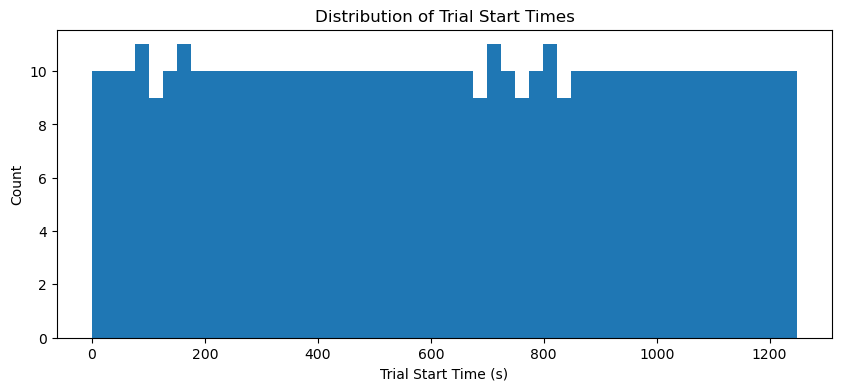

In [11]:
try:
    # Plot trial start times
    trials = nwb.intervals["trials"]
    trial_start_times = trials["start_time"][:]
    plt.figure(figsize=(10, 4))
    plt.hist(trial_start_times, bins=50)
    plt.xlabel("Trial Start Time (s)")
    plt.ylabel("Count")
    plt.title("Distribution of Trial Start Times")
    plt.savefig("trial_start_times.png")

except Exception as e:
    print(f"Error generating trial start times histogram: {e}")